In [69]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV, StratifiedKFold, RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Ridge, RidgeCV, Lasso, LassoCV
from sklearn.preprocessing import StandardScaler 
import itertools as it
import time as time
import warnings
warnings.filterwarnings("ignore")
from pyearth import Earth

In [70]:
# Read Data
X_train = data = pd.read_csv('X_train.csv').drop(columns = 'Unnamed: 0')
X_test = pd.read_csv('X_test.csv').drop(columns = 'Unnamed: 0')
y_train = pd.read_csv('y_train.csv').drop(columns = 'Unnamed: 0').totalyearlycompensation
y_test = pd.read_csv('y_test.csv').drop(columns = 'Unnamed: 0').totalyearlycompensation

y_trans = np.log(y_train)

In [71]:
# Standardized Data
scaler = StandardScaler()
scaler.fit(X_train)

X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

# Lasso

## Naive Lasso Model

In [93]:
# Naive Model MAE
lasso_model = Lasso().fit(X_train_std, y_train)
print('MAE:', mean_absolute_error(lasso_model.predict(X_test_std), y_test))

MAE: 55644.789425716466


## Coarse Search

Time Taken: 1 minutes


Text(0, 0.5, 'Standardized coefficient')

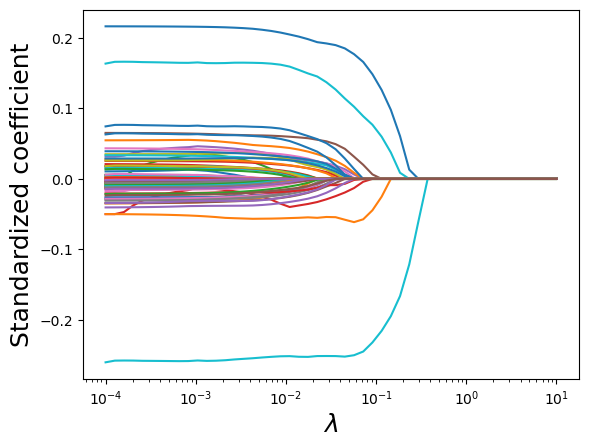

In [75]:
start_time = time.time()
alphas = 10**np.linspace(2,-3,50)*0.1

lasso = Lasso(max_iter = 1000)

coefs = []
for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train_std, y_trans)
    coefs.append(lasso.coef_)
    
print('Time Taken:', round((time.time() - start_time)/60),'minutes')
# Visualization
plt.xlabel('xlabel', fontsize=18)
plt.ylabel('ylabel', fontsize=18)
plt.plot(alphas, coefs)
plt.xscale('log')
plt.xlabel('$\lambda$')
plt.ylabel('Standardized coefficient')

In [76]:
lassocv = LassoCV(alphas = alphas,
                  cv = 10,
                  max_iter = 100000)
lassocv.fit(X_train_std, y_trans)

lassocv.alpha_

0.0005179474679231213

In [77]:
# Compute MAE on Test Data
lasso_model = Lasso(alpha = lassocv.alpha_).fit(X_train_std, y_trans)
print('MAE:', mean_absolute_error(np.exp(lasso_model.predict(X_test_std)), y_test))

MAE: 55412.6571392422


## Fine Search

In [82]:
start_time = time.time()
alphas = 10**np.linspace(-3,-2,100)

lasso = Lasso(max_iter = 1000)

coefs = []
for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train_std, y_trans)
    coefs.append(lasso.coef_)
    
print('Time Taken:', round((time.time() - start_time)/60),'minutes')

Time Taken: 1 minutes


In [87]:
lassocv = LassoCV(alphas = alphas,
                  cv = 10,
                  max_iter = 100000)
lassocv.fit(X_train_std, y_trans)

lassocv.alpha_

0.001

In [88]:
# Compute MAE on Test Data
lasso_model = Lasso(alpha = lassocv.alpha_).fit(X_train_std, y_trans)
print('MAE:', mean_absolute_error(np.exp(lasso_model.predict(X_test_std)), y_test))

MAE: 55359.46965103638


## Coefficient DF

In [85]:
coefficients = lasso_model.coef_
predictors = X_train.columns
coef_df = pd.DataFrame({'predictors': predictors,
                        'coefficients': coefficients,
                        'abs': abs(coefficients)})
coef_df.sort_values(by = 'abs', ascending = False).head(20)

,predictors,coefficients,abs
59,dmaid_0.0,-0.257835,0.257835
0,yearsofexperience,0.216080,0.216080
99,dmaid_807.0,0.165495,0.165495
100,dmaid_819.0,0.075746,0.075746
15,company_facebook,0.064215,0.064215
60,dmaid_501.0,0.063582,0.063582
41,title_Software Engineering Manager,0.055099,0.055099
21,company_other,-0.052413,0.052413
4,Doctorate_Degree,0.046447,0.046447
16,company_google,0.042078,0.042078


## Final Lasso

In [90]:
# Compute MAE on Test Data
lasso_model = Lasso(alpha = 0.001).fit(X_train_std, y_trans)
print('MAE:', mean_absolute_error(np.exp(lasso_model.predict(X_test_std)), y_test))

MAE: 55359.46965103638


# Ridge

## Naive Ridge Model

In [95]:
# Naive Model MAE
ridge_model = Ridge().fit(X_train_std, y_train)
print('MAE:', mean_absolute_error(ridge_model.predict(X_test_std), y_test))

MAE: 55647.62481082037


## Coarse Search

Text(0, 0.5, 'Standardized coefficient')

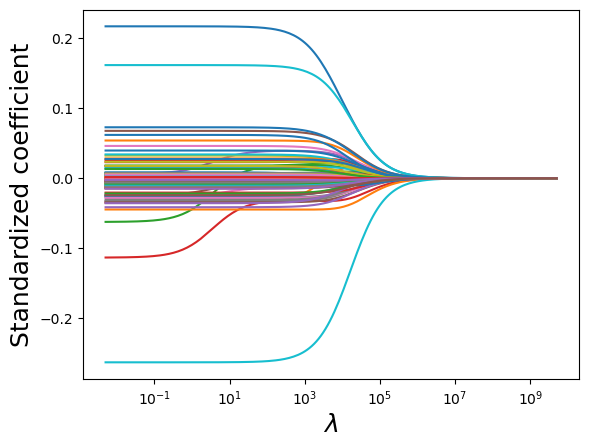

In [96]:
alphas = 10**np.linspace(10,-2,200)*0.5

# Finding Coefficients
coefs = []
for a in alphas:        
    ridge = Ridge(alpha = a)
    ridge.fit(X_train_std, y_trans)
    coefs.append(ridge.coef_)

# Visualization
plt.xlabel('xlabel', fontsize=18)
plt.ylabel('ylabel', fontsize=18)
plt.plot(alphas, coefs)
plt.xscale('log')
plt.xlabel('$\lambda$')
plt.ylabel('Standardized coefficient')

In [97]:
ridgecv = RidgeCV(alphas = alphas,
                  scoring = 'neg_mean_squared_error',
                  cv = 10)
ridgecv.fit(X_train_std, y_trans)

ridgecv.alpha_

83.19084430380654

In [98]:
# Compute MAE on Test Data
ridge_model = Ridge(alpha = ridgecv.alpha_).fit(X_train_std, y_trans)
print('MAE:', mean_absolute_error(np.exp(ridge_model.predict(X_test_std)), y_test))

MAE: 55396.47740874736


## Fine Search

In [99]:
alphas = 10**np.linspace(1.7,2.06,200)

# Finding Coefficients
coefs = []
for a in alphas:        
    ridge = Ridge(alpha = a)
    ridge.fit(X_train_std, y_trans)
    coefs.append(ridge.coef_)

In [100]:
ridgecv = RidgeCV(alphas = alphas,
                  scoring = 'neg_mean_squared_error',
                  cv = 10)
ridgecv.fit(X_train_std, y_trans)

ridgecv.alpha_

85.06457640936617

In [101]:
# Compute MAE on Test Data
ridge_model = Ridge(alpha = ridgecv.alpha_).fit(X_train_std, y_trans)
print('MAE:', mean_absolute_error(np.exp(ridge_model.predict(X_test_std)), y_test))

MAE: 55394.62930684184


## Coefficient DF

In [102]:
coefficients = ridge_model.coef_
predictors = X_train.columns
coef_df = pd.DataFrame({'predictors': predictors,
                        'coefficients': coefficients,
                        'abs': abs(coefficients)})
coef_df.sort_values(by = 'abs', ascending = False).head(20)

,predictors,coefficients,abs
59,dmaid_0.0,-0.261318,0.261318
0,yearsofexperience,0.214435,0.214435
99,dmaid_807.0,0.160647,0.160647
100,dmaid_819.0,0.072216,0.072216
15,company_facebook,0.067309,0.067309
60,dmaid_501.0,0.061408,0.061408
41,title_Software Engineering Manager,0.053738,0.053738
16,company_google,0.045901,0.045901
21,company_other,-0.044681,0.044681
34,title_Business Analyst,-0.041239,0.041239


## Final Ridge

In [103]:
# Compute MAE on Test Data
ridge_model = Ridge(alpha = 85.06457640936617).fit(X_train_std, y_trans)
print('MAE:', mean_absolute_error(np.exp(ridge_model.predict(X_test_std)), y_test))

MAE: 55394.62930684184
